بناء نموذج تنبؤ قدرة المتدين على التسديد

In [1]:
import pandas as pd

In [3]:
data=pd.read_csv('loan_classification.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

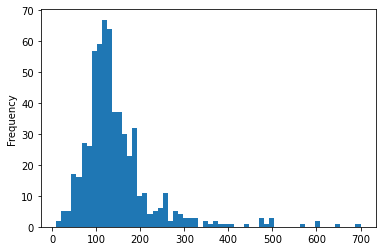

In [9]:
data['LoanAmount'].plot.hist(bins=60)

<AxesSubplot:ylabel='Frequency'>

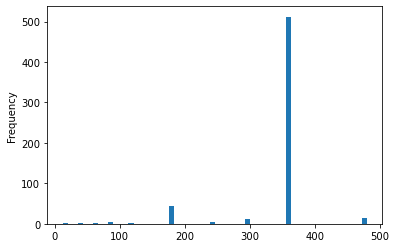

In [10]:
data['Loan_Amount_Term'].plot.hist(bins=60)

<AxesSubplot:ylabel='Frequency'>

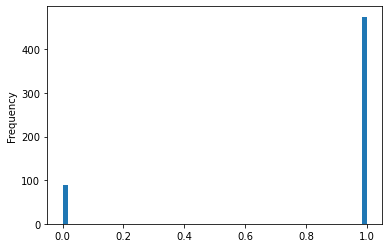

In [11]:
data['Credit_History'].plot.hist(bins=60)

In [14]:
cols_to_fill_na = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in cols_to_fill_na:
    data[col].fillna(-1, inplace=True)
data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,-1.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [15]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
data['Dependents'].value_counts() #0

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [24]:
data['Gender'].value_counts() # male

Male      489
Female    112
Name: Gender, dtype: int64

In [25]:
data['Married'].value_counts() #yes

Yes    398
No     213
Name: Married, dtype: int64

In [28]:
data['Self_Employed'].value_counts() #no

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [31]:
data['Gender'].fillna('Male' , inplace=True)
data['Married'].fillna('Yes' , inplace=True)
data['Self_Employed'].fillna('No' , inplace=True)
data['Dependents'].fillna('0' , inplace=True)
data.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [36]:
data['Gender'].replace('Male', 0 ,inplace=True)
data['Gender'].replace('Female', 1 ,inplace=True)

data['Married'].replace('No', 0 ,inplace=True)
data['Married'].replace('Yes', 1 ,inplace=True)


data['Self_Employed'].replace('No', 0 ,inplace=True)
data['Self_Employed'].replace('Yes', 1 ,inplace=True)

data['Education'].replace('Graduate', 1 ,inplace=True)
data['Education'].replace('Not Graduate', 0  ,inplace=True)



In [37]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,-1.0,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [40]:
to_dummies_cols=['Dependents' , 'Property_Area'  ]
for col in to_dummies_cols:
    news_cols=pd.get_dummies(data[col],prefix=col)
    data= pd.concat([data , news_cols],axis=1)
    data.drop(col , inplace=True ,axis=1)

In [41]:
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Dependents_1,Dependents_2,Dependents_3+,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,0,1,0,5849,0.0,-1.0,360.0,1.0,...,0,0,0,1,0,0,0,0,0,1
1,LP001003,0,1,1,0,4583,1508.0,128.0,360.0,1.0,...,1,0,0,0,1,0,0,1,0,0
2,LP001005,0,1,1,1,3000,0.0,66.0,360.0,1.0,...,0,0,0,1,0,0,0,0,0,1
3,LP001006,0,1,0,0,2583,2358.0,120.0,360.0,1.0,...,0,0,0,1,0,0,0,0,0,1
4,LP001008,0,0,1,0,6000,0.0,141.0,360.0,1.0,...,0,0,0,1,0,0,0,0,0,1


In [42]:
data['Loan_Status'].replace('Y', 1, inplace=True)
data['Loan_Status'].replace('N', 0, inplace=True)

C:\Users\KRM0201517\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [43]:
y=data['Loan_Status']
X=data.drop(columns=['Loan_Status','Loan_ID'])

In [44]:
X.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849,0.0,-1.0,360.0,1.0,1,0,0,0,1,0,0,0,0,0,1
1,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0,1,0,0
2,0,1,1,1,3000,0.0,66.0,360.0,1.0,1,0,0,0,1,0,0,0,0,0,1
3,0,1,0,0,2583,2358.0,120.0,360.0,1.0,1,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,0,0,0,0,0,1


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)



In [46]:
len(X_train)

521

In [47]:
len(X_test)

93

In [48]:
len(y_train)

521

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [50]:
model.fit(X_train ,y_train)

LogisticRegression()

In [51]:
preda=model.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score , confusion_matrix

accuracy_score(preda ,y_test)

0.7096774193548387

In [61]:
confusion_matrix(y_test , preda)

array([[ 7, 20],
       [ 7, 59]], dtype=int64)

In [62]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [63]:
accuracy_score(preda ,y_test)

0.7096774193548387

In [66]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)

AdaBoostClassifier()

In [67]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.8064516129032258